In [302]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

## First Dataset: Netflix Titles

In [303]:
df = pd.read_csv("netflix_titles.csv")
#df = pd.read_csv(r"C:\Users\Seph Chen\OneDrive - Nanyang Technological University\Desktop\data/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Dataset Study

The Netflix Titles dataset consists of 8807 number of series titles and there are 12 columns for analysis.

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [305]:
len(df)

8807

In [306]:
df['description'][0]

'As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'

## Analysis of Netflix Show Types

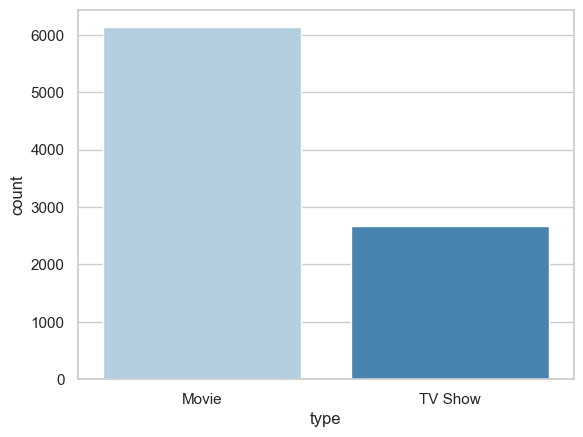

In [307]:
sns.set(style="whitegrid")
axis = sns.countplot(x="type", data = df , palette= "Blues" )

The following above shows that there are more Movies than TV Shows. Therefore, the recommendation system may be skewed towards recommending Movies to user 

## Analysis of the Netflix's series' Release Year

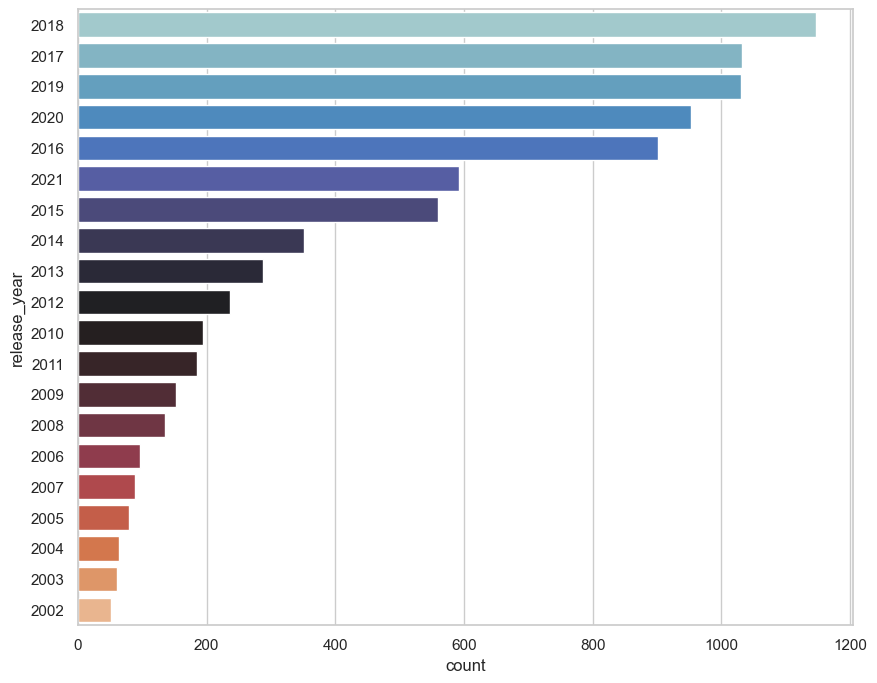

In [308]:
plt.figure(figsize = (10,8))
sns.set(style = "whitegrid")
axis = sns.countplot( y = "release_year", data = df, palette = "icefire", order = df["release_year"].value_counts().index[0:20] )

It is observed that 2018 has the most number of netflix titles being released which is followed by 2017, 2019 and 2020. <br>
Some possible reason that this was observed could be due to the Covid-19 Pandemic in 2019 which result in the decrease. 

## Displaying the netflix title listed_in

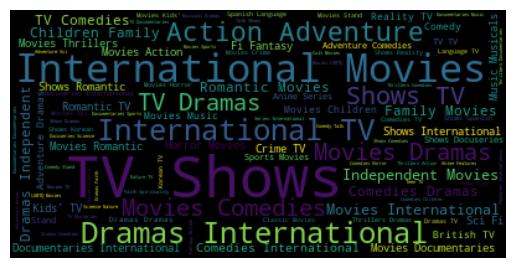

In [309]:
from wordcloud import WordCloud, STOPWORDS
text = " ".join(listedin for listedin in df["listed_in"])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

From the wordcloud, TV Shows, International movies and Dramas International are the Top 3 listed_in

## Preprocessing for Netflix Data

In [310]:
# convert lowercase and remove numbers, punctuations, spaces, etc.,
df['clean_plot'] = df['description'].str.lower()
df['clean_plot'] = df['clean_plot'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))
df['clean_plot'] = df['clean_plot'].apply(lambda x: re.sub('\s+', ' ', x))
df['clean_plot']


0       as her father nears the end of his life filmma...
1       after crossing paths at a party a cape town te...
2       to protect his family from a powerful drug lor...
3       feuds flirtations and toilet talk go down amon...
4       in a city of coaching centers known to train i...
                              ...                        
8802    a political cartoonist a crime reporter and a ...
8803    while living alone in a spooky town a young gi...
8804    looking to survive in a world taken over by zo...
8805    dragged from civilian life a former superhero ...
8806    a scrappy but poor boy worms his way into a ty...
Name: clean_plot, Length: 8807, dtype: object

In [311]:
import nltk
nltk.download('punkt')

# tokenize the sentence
df['clean_plot'] = df['clean_plot'].apply(lambda x: nltk.word_tokenize(x))
df['clean_plot']

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eric2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0       [as, her, father, nears, the, end, of, his, li...
1       [after, crossing, paths, at, a, party, a, cape...
2       [to, protect, his, family, from, a, powerful, ...
3       [feuds, flirtations, and, toilet, talk, go, do...
4       [in, a, city, of, coaching, centers, known, to...
                              ...                        
8802    [a, political, cartoonist, a, crime, reporter,...
8803    [while, living, alone, in, a, spooky, town, a,...
8804    [looking, to, survive, in, a, world, taken, ov...
8805    [dragged, from, civilian, life, a, former, sup...
8806    [a, scrappy, but, poor, boy, worms, his, way, ...
Name: clean_plot, Length: 8807, dtype: object

In [312]:
import nltk
nltk.download('stopwords')

# remove stopwords
stop_words = nltk.corpus.stopwords.words('english')
plot = []
for sentence in df['clean_plot']:
    temp = []
    for word in sentence:
        if word not in stop_words and len(word) >= 3:
            temp.append(word)
    plot.append(temp)
plot

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eric2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['father',
  'nears',
  'end',
  'life',
  'filmmaker',
  'kirsten',
  'johnson',
  'stages',
  'death',
  'inventive',
  'comical',
  'ways',
  'help',
  'face',
  'inevitable'],
 ['crossing',
  'paths',
  'party',
  'cape',
  'town',
  'teen',
  'sets',
  'prove',
  'whether',
  'private',
  'school',
  'swimming',
  'star',
  'sister',
  'abducted',
  'birth'],
 ['protect',
  'family',
  'powerful',
  'drug',
  'lord',
  'skilled',
  'thief',
  'mehdi',
  'expert',
  'team',
  'robbers',
  'pulled',
  'violent',
  'deadly',
  'turf',
  'war'],
 ['feuds',
  'flirtations',
  'toilet',
  'talk',
  'among',
  'incarcerated',
  'women',
  'orleans',
  'justice',
  'center',
  'new',
  'orleans',
  'gritty',
  'reality',
  'series'],
 ['city',
  'coaching',
  'centers',
  'known',
  'train',
  'india',
  'finest',
  'collegiate',
  'minds',
  'earnest',
  'unexceptional',
  'student',
  'friends',
  'navigate',
  'campus',
  'life'],
 ['arrival',
  'charismatic',
  'young',
  'priest',
 

In [313]:

df['clean_plot'] = plot

In [314]:
df['clean_plot']

0       [father, nears, end, life, filmmaker, kirsten,...
1       [crossing, paths, party, cape, town, teen, set...
2       [protect, family, powerful, drug, lord, skille...
3       [feuds, flirtations, toilet, talk, among, inca...
4       [city, coaching, centers, known, train, india,...
                              ...                        
8802    [political, cartoonist, crime, reporter, pair,...
8803    [living, alone, spooky, town, young, girl, bef...
8804    [looking, survive, world, taken, zombies, dork...
8805    [dragged, civilian, life, former, superhero, m...
8806    [scrappy, poor, boy, worms, way, tycoon, dysfu...
Name: clean_plot, Length: 8807, dtype: object

In [315]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,clean_plot
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...","[father, nears, end, life, filmmaker, kirsten,..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[crossing, paths, party, cape, town, teen, set..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"[protect, family, powerful, drug, lord, skille..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","[feuds, flirtations, toilet, talk, among, inca..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"[city, coaching, centers, known, train, india,..."


In [316]:
#Removing NaN results
df['cast'] = df['cast'].fillna(' ')
df['director'] = df['director'].fillna(' ')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,clean_plot
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...","[father, nears, end, life, filmmaker, kirsten,..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[crossing, paths, party, cape, town, teen, set..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"[protect, family, powerful, drug, lord, skille..."
3,s4,TV Show,Jailbirds New Orleans,,,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","[feuds, flirtations, toilet, talk, among, inca..."
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"[city, coaching, centers, known, train, india,..."


In [317]:
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(','))
#df['cast'] = df['cast'].apply(lambda x: x.split(','))
#df['director'] = df['director'].apply(lambda x: x.split(','))

In [318]:
df['listed_in'].head()

0                                      [Documentaries]
1    [International TV Shows,  TV Dramas,  TV Myste...
2    [Crime TV Shows,  International TV Shows,  TV ...
3                            [Docuseries,  Reality TV]
4    [International TV Shows,  Romantic TV Shows,  ...
Name: listed_in, dtype: object

In [319]:
df['cast'] = df['cast'].apply(lambda x: x.split(',')[:4])

In [320]:
df['cast'].head()

0                                                  [ ]
1    [Ama Qamata,  Khosi Ngema,  Gail Mabalane,  Th...
2    [Sami Bouajila,  Tracy Gotoas,  Samuel Jouy,  ...
3                                                  [ ]
4    [Mayur More,  Jitendra Kumar,  Ranjan Raj,  Al...
Name: cast, dtype: object

In [321]:
df['director'] = df['director'].apply(lambda x: x.split(','))

In [322]:
df['director'].head()

0    [Kirsten Johnson]
1                  [ ]
2    [Julien Leclercq]
3                  [ ]
4                  [ ]
Name: director, dtype: object

In [323]:
df['cast'][1]

['Ama Qamata', ' Khosi Ngema', ' Gail Mabalane', ' Thabang Molaba']

In [324]:
def clean(sentence):
    temp = []
    for word in sentence:
        temp.append(word.lower().replace(' ', ''))
    return temp

In [325]:
df['listed_in'] = [clean(x) for x in df['listed_in']]
df['cast'] = [clean(x) for x in df['cast']]
df['director'] = [clean(x) for x in df['director']]

In [326]:
df['cast'][1]

['amaqamata', 'khosingema', 'gailmabalane', 'thabangmolaba']

In [327]:
# combining all the columns data
#columns = ['clean_plot', 'listed_in', 'cast', 'director']
columns = ['clean_plot']

def merge_Columns(columns,dfImdb):

    list1 = []
    for i in range(len(dfImdb)):
        words = ''
        for col in columns:
            words += ' '.join(dfImdb[col][i]) + ' '
        list1.append(words)
    return list1

l = merge_Columns(columns,df)
l

['father nears end life filmmaker kirsten johnson stages death inventive comical ways help face inevitable ',
 'crossing paths party cape town teen sets prove whether private school swimming star sister abducted birth ',
 'protect family powerful drug lord skilled thief mehdi expert team robbers pulled violent deadly turf war ',
 'feuds flirtations toilet talk among incarcerated women orleans justice center new orleans gritty reality series ',
 'city coaching centers known train india finest collegiate minds earnest unexceptional student friends navigate campus life ',
 'arrival charismatic young priest brings glorious miracles ominous mysteries renewed religious fervor dying town desperate believe ',
 'equestria divided bright eyed hero believes earth ponies pegasi unicorns pals hoof heart determined prove ',
 'photo shoot ghana american model slips back time becomes enslaved plantation bears witness agony ancestral past ',
 'talented batch amateur bakers face week competition whippin

In [328]:
df['clean_input'] = l
df = df[['title', 'clean_input']]
df.head()

,title,clean_input
0,Dick Johnson Is Dead,father nears end life filmmaker kirsten johnso...
1,Blood & Water,crossing paths party cape town teen sets prove...
2,Ganglands,protect family powerful drug lord skilled thie...
3,Jailbirds New Orleans,feuds flirtations toilet talk among incarcerat...
4,Kota Factory,city coaching centers known train india finest...


In [329]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf = TfidfVectorizer()
features = tfidf.fit_transform(df['clean_input'])

#### Utilising Cosine Similarity for Features

In [330]:
# create cosine similarity matrix
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(features, features)
print(cosine_sim)

[[1.         0.         0.         ... 0.         0.0149629  0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.02230089]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.0149629  0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.02230089 ... 0.         0.         1.        ]]


#### Utilising Euclidean Distance for Features

In [331]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_dist = euclidean_distances(features,features)
print(euclidean_dist)

[[0.         1.41421356 1.41421356 ... 1.41421356 1.40359332 1.41421356]
 [1.41421356 0.         1.41421356 ... 1.41421356 1.41421356 1.41421356]
 [1.41421356 1.41421356 0.         ... 1.41421356 1.41421356 1.39835554]
 ...
 [1.41421356 1.41421356 1.41421356 ... 0.         1.41421356 1.41421356]
 [1.40359332 1.41421356 1.41421356 ... 1.41421356 0.         1.41421356]
 [1.41421356 1.41421356 1.39835554 ... 1.41421356 1.41421356 0.        ]]


In [332]:
index = pd.Series(df['title'])
index.head()

0     Dick Johnson Is Dead
1            Blood & Water
2                Ganglands
3    Jailbirds New Orleans
4             Kota Factory
Name: title, dtype: object

In [333]:
def recommend_netflix(title):
    movies = []
    idx = index[index == title].index[0]
    
    print('NETFLIX INDEX:')
    print(idx)
    score = pd.Series(cosine_sim[idx]).sort_values(ascending=False)
    
    print('')
    print('COS SIM SCORE:')
    print(score)
    top10 = list(score.iloc[1:11].index)
    
    print('')
    print('TOP 10 RECS:')
    print(top10)
    
    for i in top10:
        movies.append(df['title'][i])
    return movies

In [334]:
def recommend_netflix_ed(title):
    movies = []
    idx = index[index == title].index[0]
    
    print('NETFLIX INDEX:')
    print(idx)
    score = pd.Series(euclidean_dist[idx]).sort_values(ascending=True)
    
    print('')
    print('EUCLIDEAN DISTANCE SCORE:')
    print(score)
    top10 = list(score.iloc[1:11].index)
    
    print('')
    print('TOP 10 RECS:')
    print(top10)
    
    for i in top10:
        movies.append(df['title'][i])
        
    return movies

#### Performance Metrics with RMSE ( Root Mean Square Error )

In [335]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(euclidean_dist, test_size=0.2)

# Function to predict ratings
def predict(data, similarity, type='item'):
    if type == 'item':
        pred = data.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred


#### RMSE Formula and Implementation

In [336]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE
def rmse(pred, actual):
    return sqrt(mean_squared_error(pred, actual))

# Predict ratings on the training data with similarity score
item_prediction = predict(train_data, cosine_sim, type='item')

# RMSE on the train data
print('Item-based CF RMSE: ' + str(rmse(item_prediction, train_data)))


Item-based CF RMSE: 0.01690554695233541


In [337]:
recommend_netflix('Squid Game')

NETFLIX INDEX:
33

COS SIM SCORE:
33      1.000000
1011    0.197596
1440    0.153000
1242    0.152129
5903    0.150347
          ...   
3065    0.000000
3063    0.000000
3062    0.000000
3061    0.000000
8806    0.000000
Length: 8807, dtype: float64

TOP 10 RECS:
[1011, 1440, 1242, 5903, 1615, 2914, 4789, 834, 5411, 2591]


['Free to Play',
 'Nailed It! Mexico',
 'Murder Among the Mormons',
 'Creep',
 'Ink Master',
 'Isi & Ossi',
 'King of Peking',
 'Blue Miracle',
 'Zipi & Zape y la Isla del Capitan',
 'The Half Of It']

In [338]:
recommend_netflix_ed('Squid Game')

NETFLIX INDEX:
33

EUCLIDEAN DISTANCE SCORE:
33      0.000000
1011    1.266810
1440    1.301538
1242    1.302207
5903    1.303574
          ...   
8143    1.414214
2733    1.414214
1157    1.414214
632     1.414214
2891    1.414214
Length: 8807, dtype: float64

TOP 10 RECS:
[1011, 1440, 1242, 5903, 1615, 2914, 4789, 834, 5411, 2591]


['Free to Play',
 'Nailed It! Mexico',
 'Murder Among the Mormons',
 'Creep',
 'Ink Master',
 'Isi & Ossi',
 'King of Peking',
 'Blue Miracle',
 'Zipi & Zape y la Isla del Capitan',
 'The Half Of It']

In [339]:
index[index == 'Sex Education'].index[0]

32

In [340]:
pd.Series(cosine_sim[3]).sort_values(ascending=False)

3       1.000000
2132    0.178974
1391    0.176787
8495    0.170294
4709    0.168806
          ...   
3193    0.000000
3192    0.000000
3191    0.000000
3190    0.000000
8806    0.000000
Length: 8807, dtype: float64

In [341]:
recommend_netflix('Girl from Nowhere')

NETFLIX INDEX:
516

COS SIM SCORE:
516     1.000000
2963    0.199672
6383    0.114275
8409    0.106995
3322    0.106847
          ...   
3102    0.000000
3100    0.000000
3099    0.000000
3098    0.000000
8806    0.000000
Length: 8807, dtype: float64

TOP 10 RECS:
[2963, 6383, 8409, 3322, 5419, 7907, 7174, 6760, 1777, 933]


['Misfit 2',
 'Bruno and Boots: The Wizzle War',
 'The Mad Monk',
 'Liar, Liar, Vampire',
 'You Get Me',
 'Russell Madness',
 'Kay Dyache Bola',
 'FirstBorn',
 'Kaali Khuhi',
 "Hachi: A Dog's Tale"]

## Second Dataset: IMDB Top 1000

In [342]:
dfImdb = pd.read_csv("imdb_top_1000.csv")
dfImdb.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [343]:
dfImdb["Overview"].head()

0    Two imprisoned men bond over a number of years...
1    An organized crime dynasty's aging patriarch t...
2    When the menace known as the Joker wreaks havo...
3    The early life and career of Vito Corleone in ...
4    A jury holdout attempts to prevent a miscarria...
Name: Overview, dtype: object

In [344]:
dfImdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


## Preprocessing for IMDB Top 1000 Dataset

In [345]:
dfImdb['clean_overview'] = dfImdb["Overview"].str.lower()
dfImdb['clean_overview'] = dfImdb['clean_overview'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))
dfImdb['clean_overview'] = dfImdb['clean_overview'].apply(lambda x: re.sub('\s+', ' ', x))
dfImdb['clean_overview']

0      two imprisoned men bond over a number of years...
1      an organized crime dynasty s aging patriarch t...
2      when the menace known as the joker wreaks havo...
3      the early life and career of vito corleone in ...
4      a jury holdout attempts to prevent a miscarria...
                             ...                        
995    a young new york socialite becomes interested ...
996    sprawling epic covering the life of a texas ca...
997    in hawaii in a private is cruelly punished for...
998    several survivors of a torpedoed merchant ship...
999    a man in london tries to help a counter espion...
Name: clean_overview, Length: 1000, dtype: object

In [346]:
# tokenize the sentence
dfImdb['clean_overview'] = dfImdb['clean_overview'].apply(lambda x: nltk.word_tokenize(x))
dfImdb['clean_overview']

0      [two, imprisoned, men, bond, over, a, number, ...
1      [an, organized, crime, dynasty, s, aging, patr...
2      [when, the, menace, known, as, the, joker, wre...
3      [the, early, life, and, career, of, vito, corl...
4      [a, jury, holdout, attempts, to, prevent, a, m...
                             ...                        
995    [a, young, new, york, socialite, becomes, inte...
996    [sprawling, epic, covering, the, life, of, a, ...
997    [in, hawaii, in, a, private, is, cruelly, puni...
998    [several, survivors, of, a, torpedoed, merchan...
999    [a, man, in, london, tries, to, help, a, count...
Name: clean_overview, Length: 1000, dtype: object

In [347]:
stop_words = nltk.corpus.stopwords.words('english')
overview = []
for sentence in dfImdb['clean_overview']:
    temp = []
    for word in sentence:
        if word not in stop_words and len(word) >= 3:
            temp.append(word)
    overview.append(temp)
overview

[['two',
  'imprisoned',
  'men',
  'bond',
  'number',
  'years',
  'finding',
  'solace',
  'eventual',
  'redemption',
  'acts',
  'common',
  'decency'],
 ['organized',
  'crime',
  'dynasty',
  'aging',
  'patriarch',
  'transfers',
  'control',
  'clandestine',
  'empire',
  'reluctant',
  'son'],
 ['menace',
  'known',
  'joker',
  'wreaks',
  'havoc',
  'chaos',
  'people',
  'gotham',
  'batman',
  'must',
  'accept',
  'one',
  'greatest',
  'psychological',
  'physical',
  'tests',
  'ability',
  'fight',
  'injustice'],
 ['early',
  'life',
  'career',
  'vito',
  'corleone',
  'new',
  'york',
  'city',
  'portrayed',
  'son',
  'michael',
  'expands',
  'tightens',
  'grip',
  'family',
  'crime',
  'syndicate'],
 ['jury',
  'holdout',
  'attempts',
  'prevent',
  'miscarriage',
  'justice',
  'forcing',
  'colleagues',
  'reconsider',
  'evidence'],
 ['gandalf',
  'aragorn',
  'lead',
  'world',
  'men',
  'sauron',
  'army',
  'draw',
  'gaze',
  'frodo',
  'sam',
  'ap

In [348]:
dfImdb['clean_overview'] = overview
dfImdb['clean_overview']

0      [two, imprisoned, men, bond, number, years, fi...
1      [organized, crime, dynasty, aging, patriarch, ...
2      [menace, known, joker, wreaks, havoc, chaos, p...
3      [early, life, career, vito, corleone, new, yor...
4      [jury, holdout, attempts, prevent, miscarriage...
                             ...                        
995    [young, new, york, socialite, becomes, interes...
996    [sprawling, epic, covering, life, texas, cattl...
997    [hawaii, private, cruelly, punished, boxing, u...
998    [several, survivors, torpedoed, merchant, ship...
999    [man, london, tries, help, counter, espionage,...
Name: clean_overview, Length: 1000, dtype: object

In [349]:
dfImdb.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,clean_overview
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469","[two, imprisoned, men, bond, number, years, fi..."
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411","[organized, crime, dynasty, aging, patriarch, ..."
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444","[menace, known, joker, wreaks, havoc, chaos, p..."
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000","[early, life, career, vito, corleone, new, yor..."
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000","[jury, holdout, attempts, prevent, miscarriage..."


In [350]:
dfImdb['Genre'] = dfImdb['Genre'].apply(lambda x:x.split(','))
dfImdb['Director'] = dfImdb['Director'].apply(lambda x:x.split(','))

In [351]:
dfImdb['Actors'] = dfImdb['Star1'] + ',' + dfImdb['Star2'] + ',' + dfImdb['Star3'] + ',' + dfImdb['Star4']

In [352]:
dfImdb['Actors'].head()

0    Tim Robbins,Morgan Freeman,Bob Gunton,William ...
1      Marlon Brando,Al Pacino,James Caan,Diane Keaton
2    Christian Bale,Heath Ledger,Aaron Eckhart,Mich...
3    Al Pacino,Robert De Niro,Robert Duvall,Diane K...
4    Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...
Name: Actors, dtype: object

In [353]:
dfImdb['Actors'] = dfImdb['Actors'].apply(lambda x:x.split(','))
dfImdb['Actors'].head()

0    [Tim Robbins, Morgan Freeman, Bob Gunton, Will...
1    [Marlon Brando, Al Pacino, James Caan, Diane K...
2    [Christian Bale, Heath Ledger, Aaron Eckhart, ...
3    [Al Pacino, Robert De Niro, Robert Duvall, Dia...
4    [Henry Fonda, Lee J. Cobb, Martin Balsam, John...
Name: Actors, dtype: object

In [354]:
columns = ['clean_overview', 'Genre', 'Actors', 'Director']

list1 = merge_Columns(columns,dfImdb)
list1

['two imprisoned men bond number years finding solace eventual redemption acts common decency Drama Tim Robbins Morgan Freeman Bob Gunton William Sadler Frank Darabont ',
 'organized crime dynasty aging patriarch transfers control clandestine empire reluctant son Crime  Drama Marlon Brando Al Pacino James Caan Diane Keaton Francis Ford Coppola ',
 'menace known joker wreaks havoc chaos people gotham batman must accept one greatest psychological physical tests ability fight injustice Action  Crime  Drama Christian Bale Heath Ledger Aaron Eckhart Michael Caine Christopher Nolan ',
 'early life career vito corleone new york city portrayed son michael expands tightens grip family crime syndicate Crime  Drama Al Pacino Robert De Niro Robert Duvall Diane Keaton Francis Ford Coppola ',
 'jury holdout attempts prevent miscarriage justice forcing colleagues reconsider evidence Crime  Drama Henry Fonda Lee J. Cobb Martin Balsam John Fiedler Sidney Lumet ',
 'gandalf aragorn lead world men sauron

In [355]:
dfImdb['clean_data'] = list1
dfImdb = dfImdb[['Series_Title' , 'clean_data']]
dfImdb.head()

,Series_Title,clean_data
0,The Shawshank Redemption,two imprisoned men bond number years finding s...
1,The Godfather,organized crime dynasty aging patriarch transf...
2,The Dark Knight,menace known joker wreaks havoc chaos people g...
3,The Godfather: Part II,early life career vito corleone new york city ...
4,12 Angry Men,jury holdout attempts prevent miscarriage just...


In [356]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf = TfidfVectorizer()
features = tfidf.fit_transform(dfImdb['clean_data'])

#### Utilising Cosine Similarity for Features

In [357]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(features, features)
print(cosine_sim)

[[1.         0.00218733 0.00183793 ... 0.00204196 0.02526451 0.        ]
 [0.00218733 1.         0.01562771 ... 0.00208217 0.00198571 0.01333232]
 [0.00183793 0.01562771 1.         ... 0.00174956 0.01618721 0.01940358]
 ...
 [0.00204196 0.00208217 0.00174956 ... 1.         0.02616746 0.        ]
 [0.02526451 0.00198571 0.01618721 ... 0.02616746 1.         0.04940112]
 [0.         0.01333232 0.01940358 ... 0.         0.04940112 1.        ]]


#### Utilising Euclidean Distance for Features

In [358]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_dist = euclidean_distances(features,features)
print(euclidean_dist)

[[0.         1.41266604 1.41291335 ... 1.41276894 1.39623457 1.41421356]
 [1.41266604 0.         1.40311959 ... 1.41274048 1.41280876 1.40475456]
 [1.41291335 1.40311959 0.         ... 1.41297589 1.40272078 1.40042595]
 ...
 [1.41276894 1.41274048 1.41297589 ... 0.         1.39558772 1.41421356]
 [1.39623457 1.41280876 1.40272078 ... 1.39558772 0.         1.37883928]
 [1.41421356 1.40475456 1.40042595 ... 1.41421356 1.37883928 0.        ]]


In [359]:
index = pd.Series(dfImdb['Series_Title'])
index.head()

0    The Shawshank Redemption
1               The Godfather
2             The Dark Knight
3      The Godfather: Part II
4                12 Angry Men
Name: Series_Title, dtype: object

In [360]:
def movie_recommendation(series_title):
    movies = []
    idx = index[index == series_title].index[0]
    print("MOVIE INDEX:")
    print(idx)

    score = pd.Series(cosine_sim[idx]).sort_values(ascending=False)
    print('')
    print('COS SIM SCORE:')
    print(score)
    top10 = list(score.iloc[1:11].index)
    
    print('')
    print('TOP 10 RECS:')
    print(top10)

    for i in top10:
        movies.append(dfImdb['Series_Title'][i])
    return movies

In [361]:
def movie_recommendation_ed(series_title):
    movies = []
    idx = index[index == series_title].index[0]
    print("MOVIE INDEX:")
    print(idx)

    score = pd.Series(euclidean_dist[idx]).sort_values(ascending=True)
    print('')
    print('EUCLIDEAN DISTANCE SCORE:')
    print(score)
    top10 = list(score.iloc[1:11].index)
    
    print('')
    print('TOP 10 RECS:')
    print(top10)

    for i in top10:
        movies.append(dfImdb['Series_Title'][i])
    return movies

In [362]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(euclidean_dist, test_size=0.2)

# Function to predict ratings
def predict(data, similarity, type='item'):
    if type == 'item':
        pred = data.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred


In [363]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE
def rmse(pred, actual):
    return sqrt(mean_squared_error(pred, actual))

# Predict ratings on the training data with similarity score
item_prediction = predict(train_data, cosine_sim, type='item')

# RMSE on the train data
print('Item-based CF RMSE: ' + str(rmse(item_prediction, train_data)))

Item-based CF RMSE: 0.04023789101685533


In [364]:
movie_recommendation('The Dark Knight')

MOVIE INDEX:
2

COS SIM SCORE:
2      1.000000
155    0.317608
63     0.226108
36     0.156625
773    0.114832
         ...   
395    0.000000
158    0.000000
892    0.000000
170    0.000000
919    0.000000
Length: 1000, dtype: float64

TOP 10 RECS:
[155, 63, 36, 773, 241, 33, 832, 778, 692, 573]


['Batman Begins',
 'The Dark Knight Rises',
 'The Prestige',
 'Brokeback Mountain',
 'Kill Bill: Vol. 1',
 'Joker',
 'Empire of the Sun',
 'The Machinist',
 'The Man Who Would Be King',
 'Dunkirk']

In [365]:
movie_recommendation('Avengers: Endgame')

MOVIE INDEX:
59

COS SIM SCORE:
59     1.000000
60     0.519333
583    0.407409
737    0.221160
767    0.130815
         ...   
120    0.000000
539    0.000000
125    0.000000
316    0.000000
309    0.000000
Length: 1000, dtype: float64

TOP 10 RECS:
[60, 583, 737, 767, 357, 339, 914, 744, 473, 502]


['Avengers: Infinity War',
 'Captain America: Civil War',
 'Captain America: The Winter Soldier',
 'Zodiac',
 'The Avengers',
 'Guardians of the Galaxy',
 'Sherlock Holmes',
 'The Lego Movie',
 'Thor: Ragnarok',
 'Iron Man']

In [366]:
movie_recommendation_ed("Avengers: Endgame")

MOVIE INDEX:
59

EUCLIDEAN DISTANCE SCORE:
59     0.000000
60     0.980476
583    1.088661
737    1.248071
767    1.318472
         ...   
959    1.414214
948    1.414214
698    1.414214
724    1.414214
562    1.414214
Length: 1000, dtype: float64

TOP 10 RECS:
[60, 583, 737, 767, 357, 339, 914, 744, 473, 502]


['Avengers: Infinity War',
 'Captain America: Civil War',
 'Captain America: The Winter Soldier',
 'Zodiac',
 'The Avengers',
 'Guardians of the Galaxy',
 'Sherlock Holmes',
 'The Lego Movie',
 'Thor: Ragnarok',
 'Iron Man']

In [367]:
movie_recommendation_ed('The Dark Knight')

MOVIE INDEX:
2

EUCLIDEAN DISTANCE SCORE:
2      0.000000
155    1.168240
63     1.244100
36     1.298749
773    1.330540
         ...   
808    1.414214
309    1.414214
119    1.414214
158    1.414214
242    1.414214
Length: 1000, dtype: float64

TOP 10 RECS:
[155, 63, 36, 773, 241, 33, 832, 778, 692, 573]


['Batman Begins',
 'The Dark Knight Rises',
 'The Prestige',
 'Brokeback Mountain',
 'Kill Bill: Vol. 1',
 'Joker',
 'Empire of the Sun',
 'The Machinist',
 'The Man Who Would Be King',
 'Dunkirk']